# Will This Customer Purchase Your Product?

## Introduction

As a data analyst for a startup online shopping website, understanding customer behavior during peak months—November and December—is critical for optimizing marketing strategies and improving sales. This analysis aims to:

1. **Determine Purchase Rates by Customer Type:** Analyze the purchase rates for different customer types to understand their buying behavior during these months.
2. **Identify Strongest Correlation in Time Spent by Returning Customers:** Examine the correlation between different types of time spent on pages to gain insights into returning customers’ engagement.
3. **Evaluate Campaign Impact:** Assess the likelihood of achieving a target number of sales with a new marketing campaign for returning customers.

## 1. Purchase Rates by Customer Type

To understand the purchasing behavior of different customer types, we calculate the purchase rates for November and December.

In [7]:
import pandas as pd

# Load the data
shopping_data = pd.read_csv("https://raw.githubusercontent.com/oliviagaffney/oliviagaffney-data-portfolio/main/Will%20This%20Customer%20Purchase%20Your%20Product%3F/data/online_shopping_session_data.csv")

# Filter data for November and December
nov_dec_data = shopping_data[shopping_data["Month"].isin(["Nov", "Dec"])]

# Calculate purchase rates by customer type
purchase_rates = nov_dec_data.groupby("CustomerType")["Purchase"].mean().to_dict()

print(purchase_rates)

{'New_Customer': 0.2733516483516483, 'Returning_Customer': 0.1955937667920473}


### Results:

```python
{'New_Customer': 0.273, 'Returning_Customer': 0.196}

## 2. Strongest Correlation in Total Time Spent

For returning customers, we analyze the correlation between different types of page durations to identify the strongest relationship.

In [9]:
# Filter data for returning customers in November and December
nov_dec_returning_data = shopping_data[(shopping_data["CustomerType"] == "Returning_Customer") & 
                                       (shopping_data["Month"].isin(["Nov", "Dec"]))]

# Calculate correlation matrix
correlation_matrix = nov_dec_returning_data[["Administrative_Duration", 
                                             "Informational_Duration", 
                                             "ProductRelated_Duration"]].corr()

# Find the strongest correlation
strongest_correlation = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_correlation = strongest_correlation[strongest_correlation < 1]

# Get the top correlation
top_correlation_value = strongest_correlation.index[0]
top_correlation = {
    "PageType1": top_correlation_value[0],
    "PageType2": top_correlation_value[1],
    "Correlation": strongest_correlation.iloc[0]
}

print(top_correlation)

{'PageType1': 'Administrative_Duration', 'PageType2': 'ProductRelated_Duration', 'Correlation': 0.41689293883422823}


### Results:

```python
{'PageType1': 'Administrative_Duration', 'PageType2': 'ProductRelated_Duration', 'Correlation': 0.417}

## 3. Likelihood of Achieving Sales Target

With a new campaign increasing the purchase rate for returning customers by 15%, we calculate the probability of achieving at least 100 sales out of 500 sessions.

Probability of achieving at least 100 sales: 0.9190


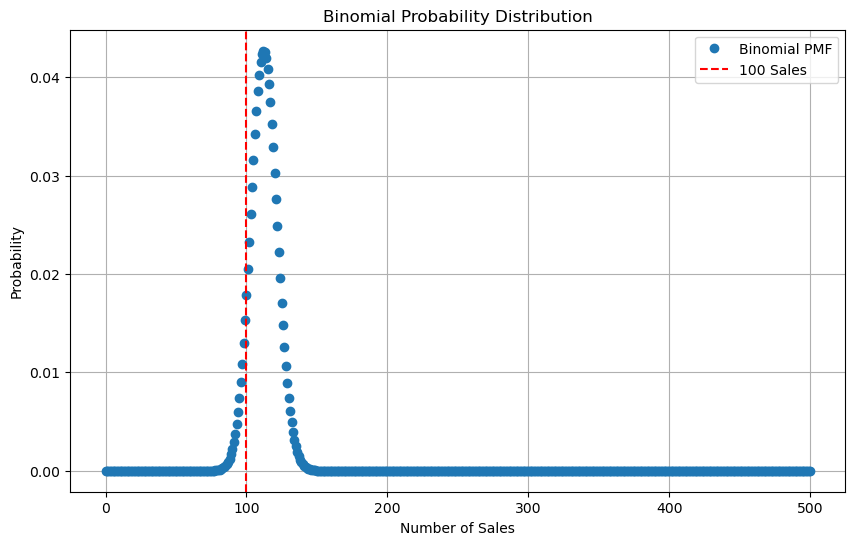

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Extract the current purchase rate for returning customers
current_purchase_rate = purchase_rates.get("Returning_Customer", 0.0)
boost = 0.15 
new_purchase_rate = current_purchase_rate * (1 + boost)

# Given values
n_sessions = 500
k_sales = 100

# Calculate probability of achieving at least 100 sales 
prob_at_least_100_sales = 1 - stats.binom.cdf(k_sales - 1, n_sessions, new_purchase_rate)

print(f"Probability of achieving at least 100 sales: {prob_at_least_100_sales:.4f}")

# Optional: Plotting the binomial distribution
x = np.arange(0, n_sessions + 1)
pmf = stats.binom.pmf(x, n_sessions, new_purchase_rate)

plt.figure(figsize=(10, 6))
plt.plot(x, pmf, 'o', label='Binomial PMF')
plt.title('Binomial Probability Distribution')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.axvline(x=k_sales, color='r', linestyle='--', label='100 Sales')
plt.legend()
plt.grid()
plt.show()

### Results:

```python
Probability of achieving at least 100 sales: 0.9190

## Summary of Findings

1. **Purchase Rates:** In November and December, the purchase rate for new customers is slightly higher compared to returning customers.
2. **Strongest Correlation:** For returning customers, the highest correlation is between time spent on administrative and product-related pages.
3. **Campaign Impact:** There is a high probability (91.90%) of achieving at least 100 sales out of 500 sessions with a 15% increase in purchase rate due to the new campaign.

## Recommendations

1. **Target New Customers:** Given the higher purchase rate, focus marketing efforts on acquiring new customers.
2. **Enhance Engagement:** Utilize insights from the strongest correlation to improve user engagement strategies, particularly between administrative and product-related pages.
3. **Plan for Campaign:** Prepare for the high likelihood of reaching the sales target with the new campaign, ensuring sufficient resources and strategies are in place.